<a href="https://colab.research.google.com/github/suganth1997/nlu-project/blob/master/Vis_bias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
from gensim.scripts.glove2word2vec import glove2word2vec 
glove2word2vec(glove_file, tmp_file)
debias = KeyedVectors.load_word2vec_format(tmp_file)

SyntaxError: ignored

In [0]:
import string
import numpy as np
import matplotlib.pyplot as plt

In [0]:
perc = []
occup =[]
for line in file:
  occupation=''
  for i in range(len(line)):
    if line[i].isdigit():
      break
    occupation=occupation + line[i]
  occup.append(occupation[:-2])
  perc.append(float(line.split()[-5]))

In [0]:
occup[:10]

['Accountants and auditors',
 'Actuaries',
 'Administrative services managers',
 'Advertising and promotions managers',
 'Advertising sales agents',
 'Aerospace engineers',
 'Agents and business managers of artists, performers, and athletes',
 'Agricultural and food science technicians',
 'Agricultural and food scientists',
 'Animal trainers']

In [0]:
gender = []
for i in range(len(perc)):
  if perc[i]>50:
    gender.append('F')
  else:
    gender.append('M')

In [0]:
outfile = open('labor_bias.txt','w')
for i in range(len(perc)):
  outfile.write(occup[i])
  outfile.write(' ')
  outfile.write(gender[i])
  outfile.write('\n')

In [2]:
import gensim
import gensim.downloader as api
for key,values in api.info()['models'].items():
  print(key)

fasttext-wiki-news-subwords-300
conceptnet-numberbatch-17-06-300
word2vec-ruscorpora-300
word2vec-google-news-300
glove-wiki-gigaword-50
glove-wiki-gigaword-100
glove-wiki-gigaword-200
glove-wiki-gigaword-300
glove-twitter-25
glove-twitter-50
glove-twitter-100
glove-twitter-200
__testing_word2vec-matrix-synopsis


In [3]:
model = api.load('glove-wiki-gigaword-300')

[=============================================-----] 90.1% 339.0/376.1MB downloaded


In [0]:
female = ['she','her','mary','herself','daughter','mother','woman','girl','gal','female']
male = ['he','him','john','himself','son','father','man','boy','guy','male']

In [0]:
def unit(v):
  return v/np.linalg.norm(v)

In [0]:
embeddings = model

In [0]:
center = (unit(embeddings[female[0]])+unit(embeddings[male[0]]))/2
mate=np.vstack((unit(embeddings[female[0]])-center,unit(embeddings[male[0]])-center))
#mate = unit(unit(embeddings[female[0]])-unit(embeddings[male[0]]))
for i in range(len(female)-1):
  center = (unit(embeddings[female[i+1]])+unit(embeddings[male[i+1]]))/2
  temp = np.vstack((unit(embeddings[female[i+1]])-center,unit(embeddings[male[i+1]])-center))
#   temp = unit(unit(embeddings[female[i+1]])-unit(embeddings[male[i+1]]))
  mate=np.vstack((mate,temp))

<BarContainer object of 20 artists>

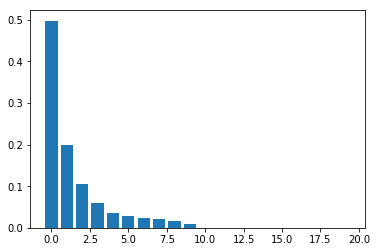

In [16]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(mate)
PC=pca.explained_variance_ratio_
g = pca.components_[0]
import matplotlib.pyplot as plt
plt.bar(range(2*len(female)),PC)

In [17]:
np.dot(unit(embeddings['he']),g)

-0.37085533

In [18]:
np.dot(unit(embeddings['she']),g)

0.29434824

In [19]:
'he' in model

True

In [0]:
occ_vw = dict()
occ = open('occupation.txt')
for line in occ:
  if line[:-1] in model:
    occ_vw[line[:-1]]=model[line[:-1]]
  else:
    continue  

In [43]:
len(occ_vw)

151

In [0]:
biases = dict()
bias_list = []
word_list=[]
for word,emb in occ_vw.items():
  temp= np.dot(unit(emb),g)
  biases[word] = temp
  bias_list.append(temp)
  word_list.append(word)

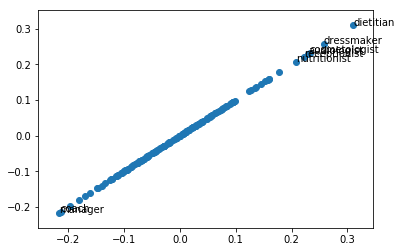

In [108]:
# plt.scatter(bias_list,bias_list)
import random
fig, ax = plt.subplots()
ax.scatter(bias_list, bias_list)

for i, txt in enumerate(word_list):
  if bias_list[i] <-0.2 or bias_list[i]>0.2:
    ax.annotate(txt, (bias_list[i], bias_list[i]))

In [51]:
np.dot(model['he'],g)

-2.1374574

In [0]:


import gensim
import numpy as np
from sklearn.manifold import TSNE
from nltk.corpus import stopwords
def get_coordinates(model, words,g):
    arr = np.empty((0,300), dtype='f')
    labels = []
    for wrd_score in words:
      wrd_vector = model[wrd_score]
      arr = np.append(arr, np.reshape(np.array(wrd_vector),(1,300)), axis=0)
      labels.append(wrd_score)

    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    return x_coords,y_coords

In [0]:
x,y = get_coordinates(occ_vw,word_list,g)

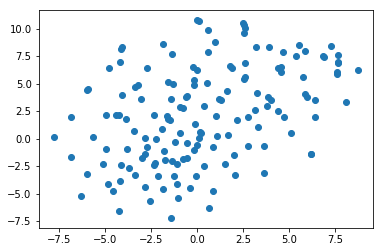

In [102]:
plt.scatter(x,y)

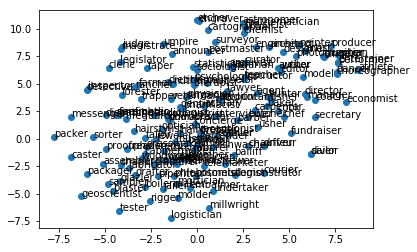

In [103]:
fig, ax = plt.subplots()
ax.scatter(x, y)

for i, txt in enumerate(word_list):
    ax.annotate(txt, (x[i], y[i]))

In [0]:
arr= np.empty((0,300))

In [0]:
 k= np.append(arr,np.reshape(np.array(model['he']),(1,300)),axis=0)